In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display

In [4]:
videogames_df = pd.read_csv('https://raw.githubusercontent.com/shishir95/machine-learning-projects/refs/heads/features/inside-into-global-sales-prediction/dataset/Video_Games_Sales_as_at_22_Dec_2016%202.csv')
videogames_df


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


##Data Preprocessing

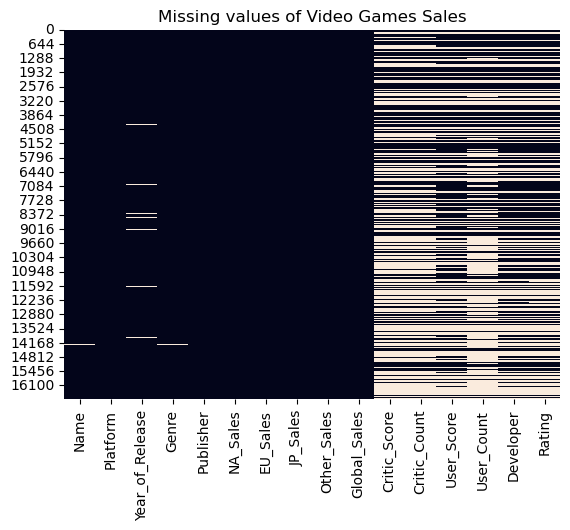

Missing Values Attribute with colimn name:
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64


In [8]:
#Check missing values
sns.heatmap(videogames_df.isnull(), cbar=False)
plt.title('Missing values of Video Games Sales')
plt.show()

missing_values = videogames_df.isnull().sum()

print("Missing Values Attribute with colimn name:")
print(missing_values)

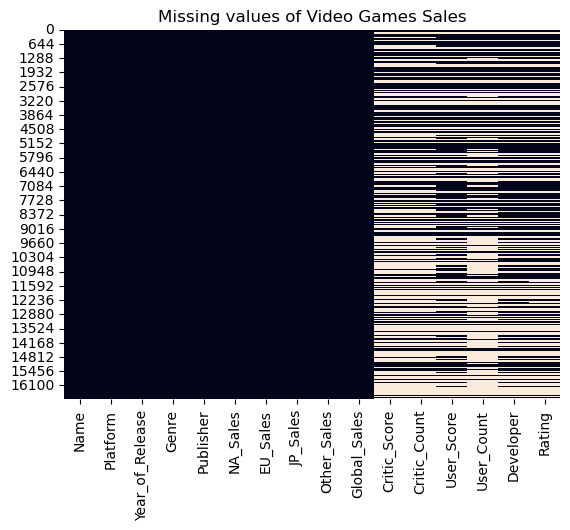

Missing Values with column name:
Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16719 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16719 non-null  int64  
 3   Genre            16719 non-null  object 
 4   Publisher        16719 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 

In [6]:
#Missing Data Handling

videogames_df[ 'Name'] = videogames_df['Name'].fillna(videogames_df['Name'].mode()[0])
videogames_df[ 'Year_of_Release'] = videogames_df['Year_of_Release'].fillna(-1).astype(int)
videogames_df[ 'Genre'] = videogames_df['Genre'].fillna("Unknown")
videogames_df[ 'Publisher'] = videogames_df['Publisher'].fillna("Unknown")
#Checking missing values
sns.heatmap(videogames_df.isnull(), cbar=False)
plt.title('Missing values of Video Games Sales')
plt.show()


missing_values = videogames_df.isnull().sum()

print("Missing Values with column name:")
print(missing_values)

videogames_df.info()

In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
#Drop Columns
videogames_df_cleaned = videogames_df.drop(["Critic_Score","Critic_Count","User_Count","Developer","User_Score","Rating"], axis=1)

In [10]:
#Best Categorical Column
categorical_columns = ['Name','Platform','Publisher','Genre']

for col in categorical_columns:
  print(f"\nTop categories in videogames {col}:")
  print(videogames_df[col].value_counts())


Top categories in videogames Name:
Name
Need for Speed: Most Wanted                         14
FIFA 14                                              9
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: count, Length: 11562, dtype: int64

Top categories in videogames Platform:
Platform
PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      432
PS4      393
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES 

In [10]:
standard_features = ['NA_Sales'	,'EU_Sales'	,'JP_Sales'	,'Other_Sales'	,'Global_Sales']

videogames_df_cleaned[standard_features] = StandardScaler().fit_transform(videogames_df_cleaned[standard_features])

videogames_df_cleaned

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,50.518992,57.255699,11.956905,45.005218,52.973092
1,Super Mario Bros.,NES,1985,Platform,Nintendo,35.423530,6.825337,21.801182,3.870656,25.652008
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,18.951283,25.066106,12.021669,17.367934,22.602694
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,18.865234,21.429874,10.370162,15.546873,20.826080
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,13.530193,17.376370,32.843612,5.102551,19.921623
...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016,Action,Tecmo Koei,-0.323705,-0.288166,-0.218913,-0.253512,-0.338230
16715,LMA Manager 2007,X360,2006,Sports,Codemasters,-0.323705,-0.268296,-0.251295,-0.253512,-0.338230
16716,Haitaka no Psychedelica,PSV,2016,Adventure,Idea Factory,-0.323705,-0.288166,-0.218913,-0.253512,-0.338230
16717,Spirits & Spells,GBA,2003,Platform,Wanadoo,-0.311412,-0.288166,-0.251295,-0.253512,-0.338230


##Exploratory Data Analysis

In [14]:
# Calculate summary statistics for the dataset
summary_stats_videogames = videogames_df_cleaned.describe(include='all').transpose()

# Display the summary statistics
print(summary_stats_videogames)

                   count unique                          top  freq  \
Name               16719  11562  Need for Speed: Most Wanted    14   
Platform           16719     31                          PS2  2161   
Year_of_Release  16719.0    NaN                          NaN   NaN   
Genre              16719     13                       Action  3370   
Publisher          16719    581              Electronic Arts  1356   
NA_Sales         16719.0    NaN                          NaN   NaN   
EU_Sales         16719.0    NaN                          NaN   NaN   
JP_Sales         16719.0    NaN                          NaN   NaN   
Other_Sales      16719.0    NaN                          NaN   NaN   
Global_Sales     16719.0    NaN                          NaN   NaN   

                       mean         std       min       25%       50%  \
Name                    NaN         NaN       NaN       NaN       NaN   
Platform                NaN         NaN       NaN       NaN       NaN   
Year_of_Re

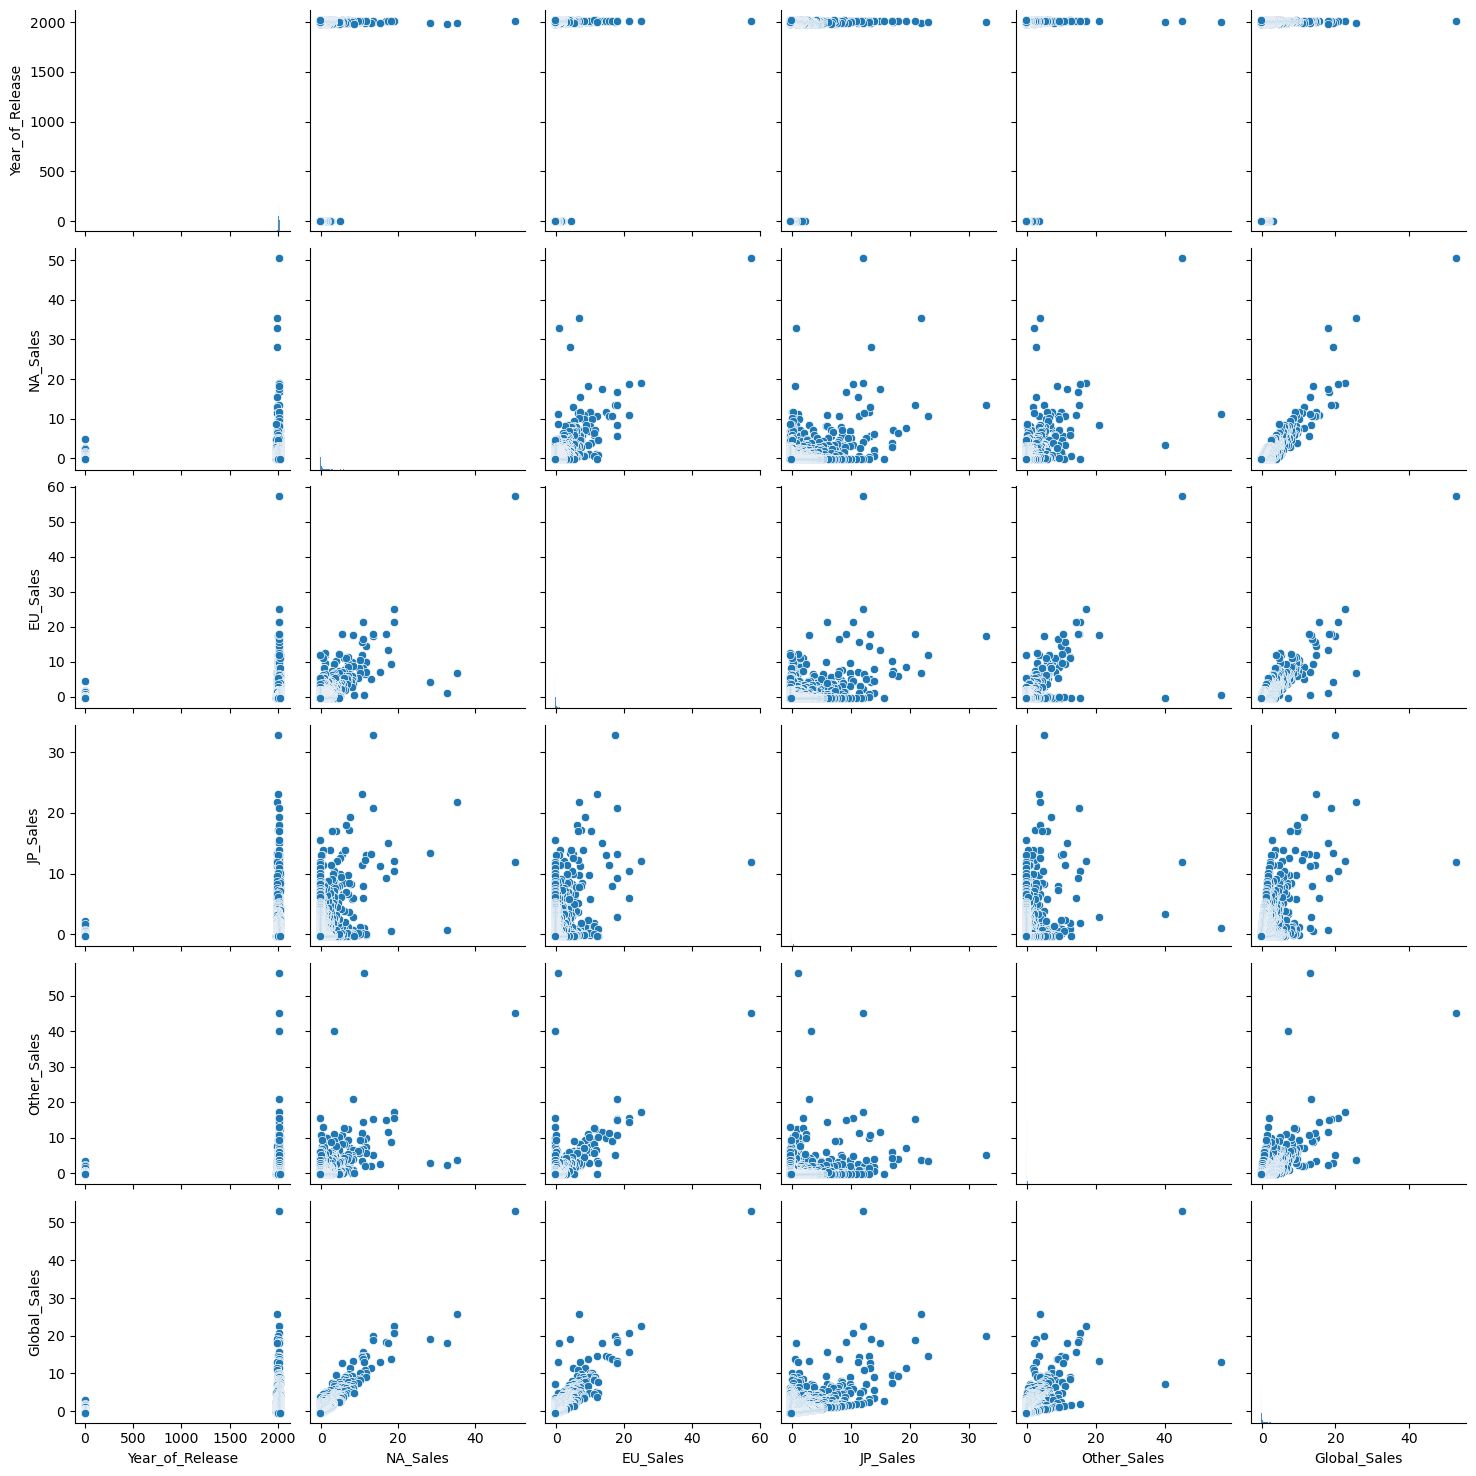

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter only numerical columns
numerical_columns = videogames_df_cleaned.select_dtypes(include=['number'])

# Generate the pairplot
sns.pairplot(data=numerical_columns)
plt.show()


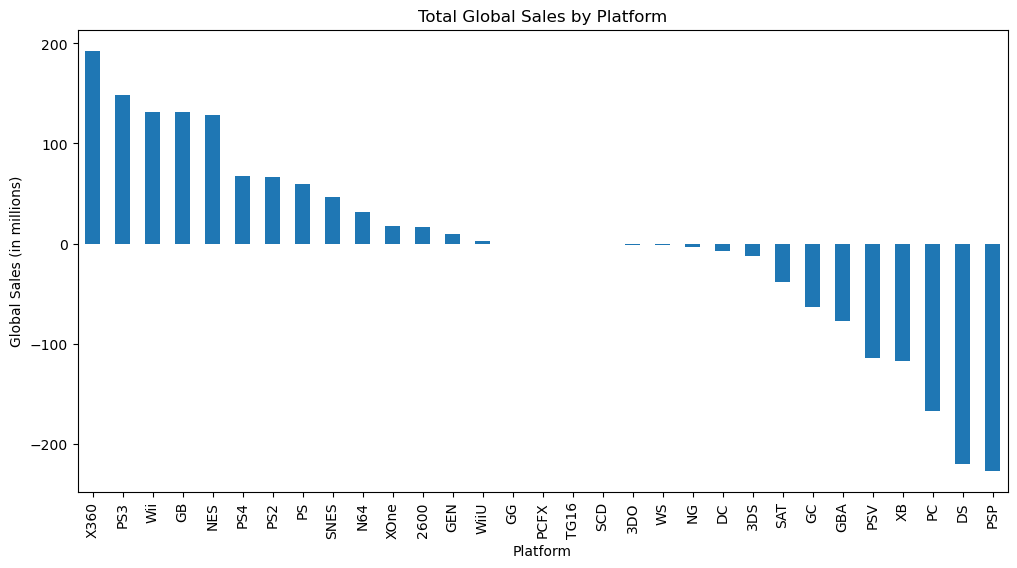

In [22]:
#Analyzing Platform data
plt.figure(figsize=(12, 6))
platform_sales = videogames_df_cleaned.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
platform_sales.plot(kind='bar')
plt.title('Total Global Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales (in millions)')
plt.show()

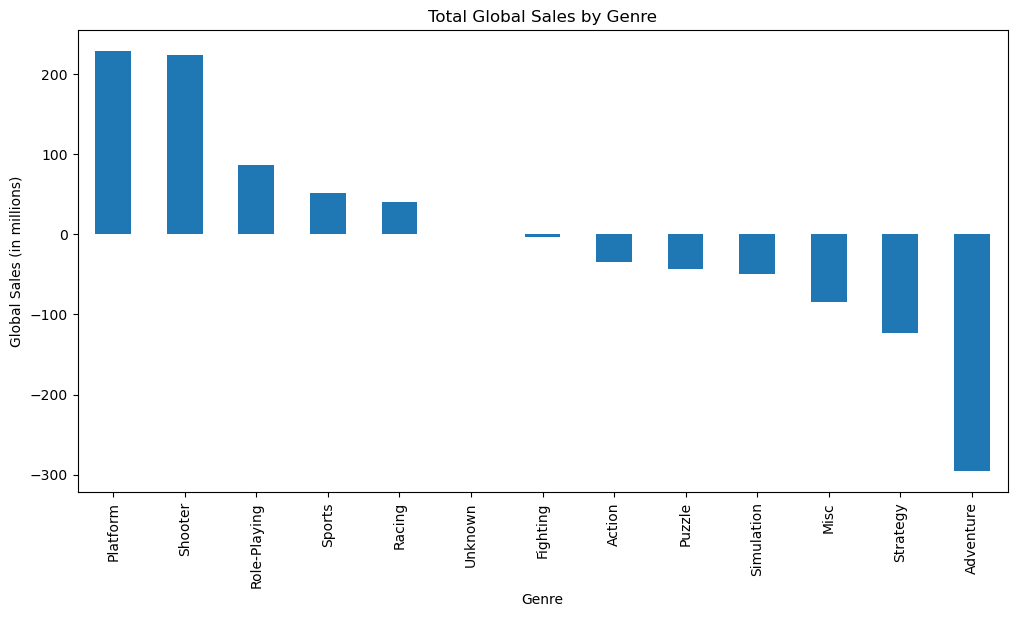

In [16]:
#Analyzing Genre data
plt.figure(figsize=(12, 6))
platform_sales = videogames_df_cleaned.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
platform_sales.plot(kind='bar')
plt.title('Total Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Global Sales (in millions)')
plt.show()

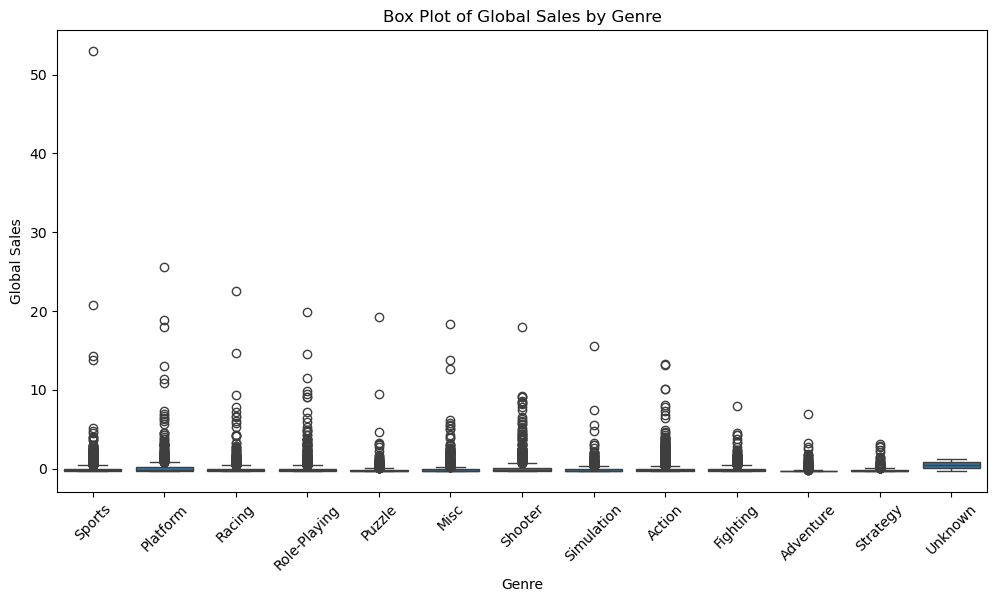

In [26]:
# Finidng the relationship with the Genre and Global Sales
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='Global_Sales', data=videogames_df_cleaned)
plt.title('Box Plot of Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Global Sales')
plt.xticks(rotation=45)
plt.show()

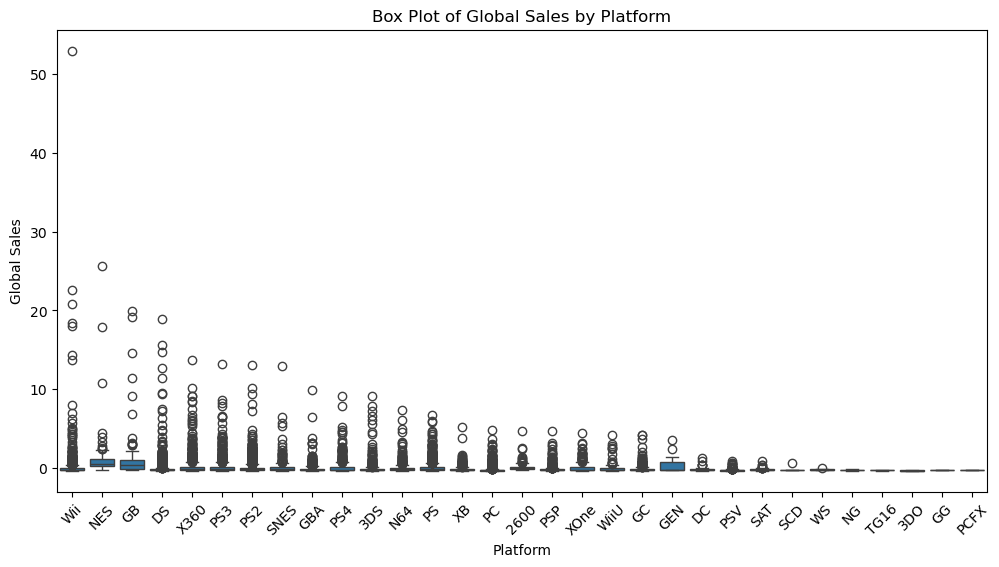

In [28]:
# Finidng the relationship with the Platform and Global Sales
plt.figure(figsize=(12, 6))
sns.boxplot(x='Platform', y='Global_Sales', data=videogames_df_cleaned)
plt.title('Box Plot of Global Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales')
plt.xticks(rotation=45)
plt.show()

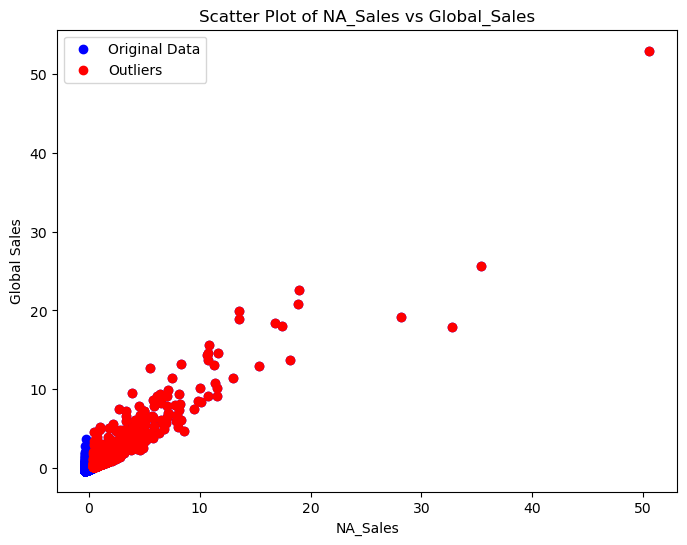

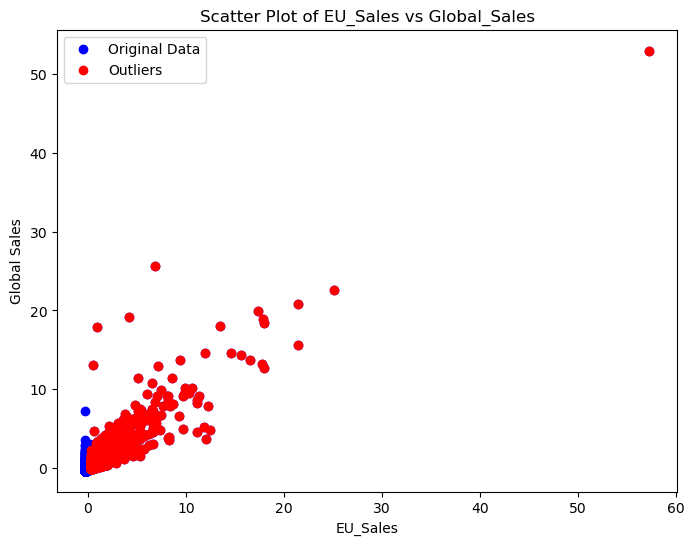

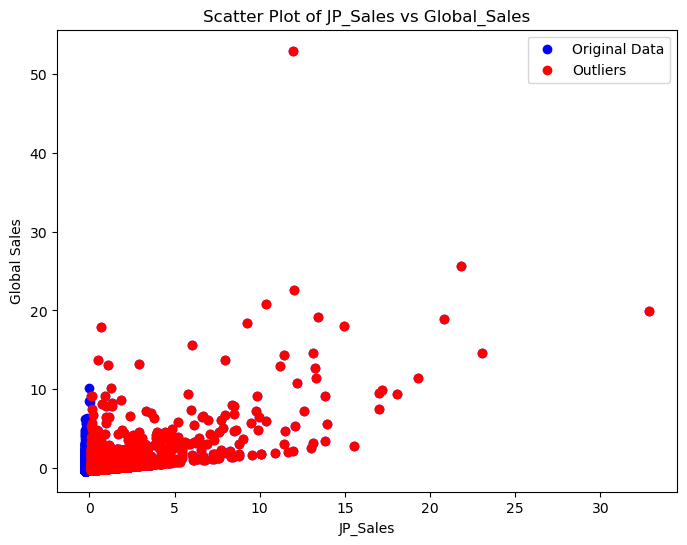

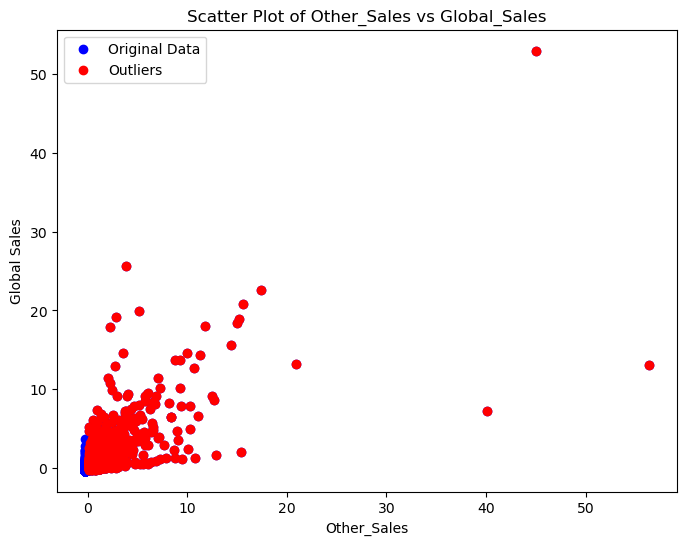

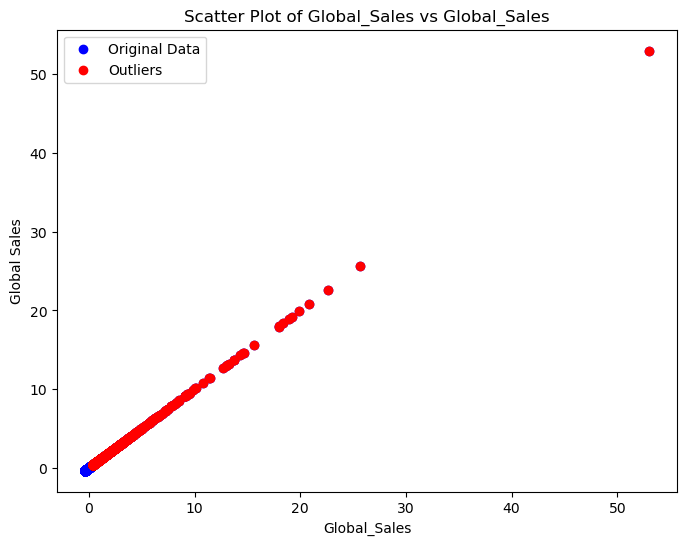

                                    Name Platform  Year_of_Release  \
0                             Wii Sports      Wii             2006   
1                      Super Mario Bros.      NES             1985   
2                         Mario Kart Wii      Wii             2008   
3                      Wii Sports Resort      Wii             2009   
4               Pokemon Red/Pokemon Blue       GB             1996   
...                                  ...      ...              ...   
1887          WWE SmackDown vs. Raw 2011      PS3             2010   
1888  LEGO Star Wars III: The Clone Wars       DS             2011   
1889                    NCAA Football 13     X360             2012   
1890                             Skate 2     X360             2009   
1891                      NFL Blitz 2000       PS             1998   

             Genre        Publisher   NA_Sales   EU_Sales   JP_Sales  \
0           Sports         Nintendo  50.518992  57.255699  11.956905   
1         Platf

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2384,Kingdoms of Amalur: Reckoning,X360,2012,Role-Playing,Electronic Arts,0.352395,0.188717,-0.218913,0.121412,0.217365
2413,Ghostbusters: The Video Game,Wii,2009,Action,Atari,0.401566,0.109236,-0.251295,0.121412,0.210905
2481,Duke Nukem Forever,X360,2011,Shooter,Take-Two Interactive,0.315517,0.208587,-0.251295,0.121412,0.191524
2497,Sid Meier's Civilization Revolution,X360,2008,Strategy,Take-Two Interactive,0.389273,0.049626,-0.251295,0.121412,0.191524
2503,James Bond 007: Nightfire,XB,2002,Shooter,Electronic Arts,0.389273,0.148977,-0.251295,-0.092830,0.185063
...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016,Action,Tecmo Koei,-0.323705,-0.288166,-0.218913,-0.253512,-0.338230
16715,LMA Manager 2007,X360,2006,Sports,Codemasters,-0.323705,-0.268296,-0.251295,-0.253512,-0.338230
16716,Haitaka no Psychedelica,PSV,2016,Adventure,Idea Factory,-0.323705,-0.288166,-0.218913,-0.253512,-0.338230
16717,Spirits & Spells,GBA,2003,Platform,Wanadoo,-0.311412,-0.288166,-0.251295,-0.253512,-0.338230


In [30]:
#Handle Outliers for the Categorical variables using IQR
outliers = pd.DataFrame()
outlier_col = ['NA_Sales', 'EU_Sales','JP_Sales','Other_Sales','Global_Sales']
for col in outlier_col: # Iterate through columns instead of groups
    Q1 = videogames_df_cleaned[col].quantile(0.25)
    Q3 = videogames_df_cleaned[col].quantile(0.75)

    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    outliers_col_data = videogames_df_cleaned[(videogames_df_cleaned[col] < lower) | (videogames_df_cleaned[col] > upper)] # Correct condition
    outliers = pd.concat([outliers, outliers_col_data])

    # Visualize outliers using scatter plots (colored differently)
    plt.figure(figsize=(8, 6)) # Create a separate figure for each column

    plt.scatter(videogames_df_cleaned[col], videogames_df_cleaned['Global_Sales'], color='blue', label='Original Data')
    plt.scatter(outliers_col_data[col], outliers_col_data['Global_Sales'], color='red', label='Outliers')

    plt.title(f'Scatter Plot of {col} vs Global_Sales')
    plt.xlabel(col)
    plt.ylabel('Global Sales')
    plt.legend()
    plt.show()

print(outliers)

#Remove outliers
videogames_df_reduced = videogames_df_cleaned[~videogames_df_cleaned.index.isin(outliers.index)]
videogames_df_reduced

# videogames_df['Global_Sales'] = np.log1p(videogames_df['Global_Sales'])

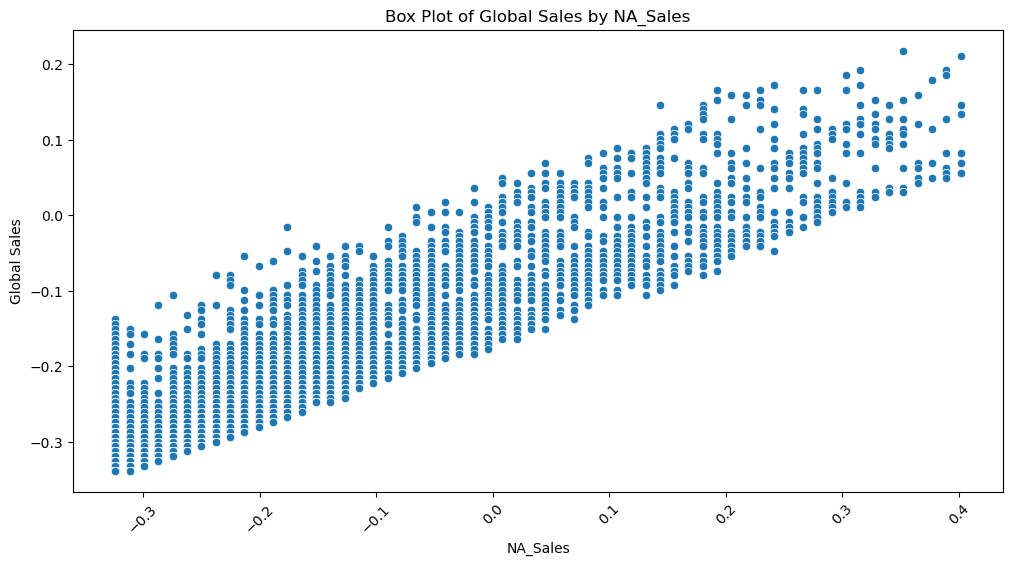

In [32]:
# Finidng the relationship with the Platform and Global Sales
plt.figure(figsize=(12, 6))
sns.scatterplot(x='NA_Sales', y='Global_Sales', data=videogames_df_reduced)
plt.title('Box Plot of Global Sales by NA_Sales')
plt.xlabel('NA_Sales')
plt.ylabel('Global Sales')
plt.xticks(rotation=45)
plt.show()

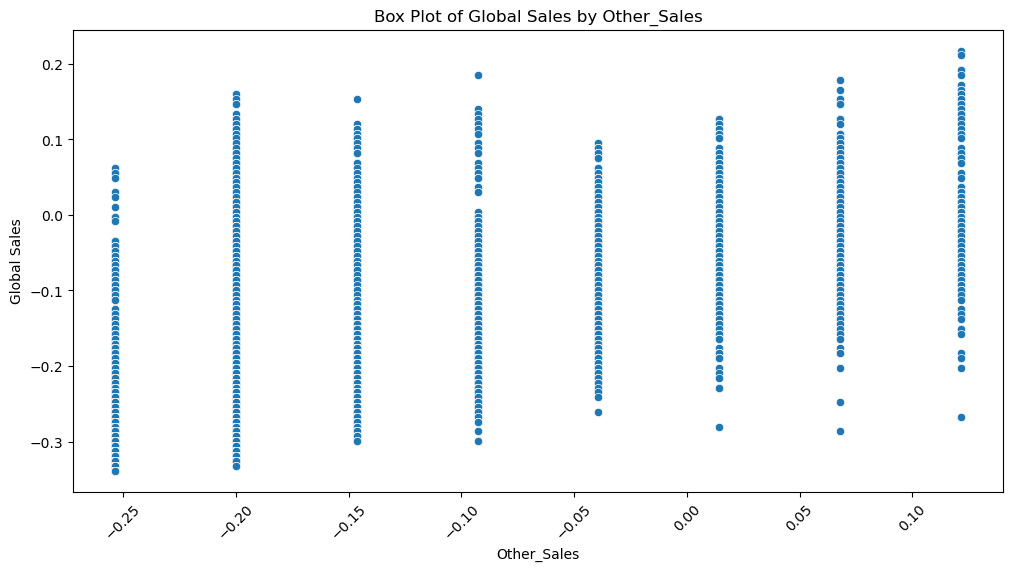

In [50]:
# Finidng the relationship with the Platform and Global Sales
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Other_Sales', y='Global_Sales', data=videogames_df_reduced)
plt.title('Box Plot of Global Sales by Other_Sales')
plt.xlabel('Other_Sales')
plt.ylabel('Global Sales')
plt.xticks(rotation=45)
plt.show()

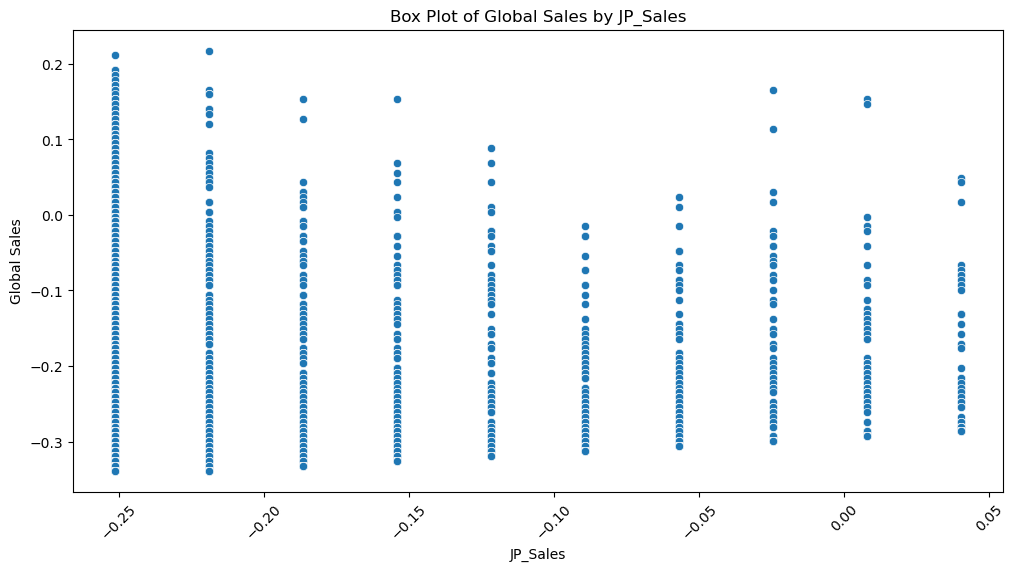

In [36]:
# Finidng the relationship with the Genre and Global Sales
plt.figure(figsize=(12, 6))
sns.scatterplot(x='JP_Sales', y='Global_Sales', data=videogames_df_reduced)
plt.title('Box Plot of Global Sales by JP_Sales')
plt.xlabel('JP_Sales')
plt.ylabel('Global Sales')
plt.xticks(rotation=45)
plt.show()

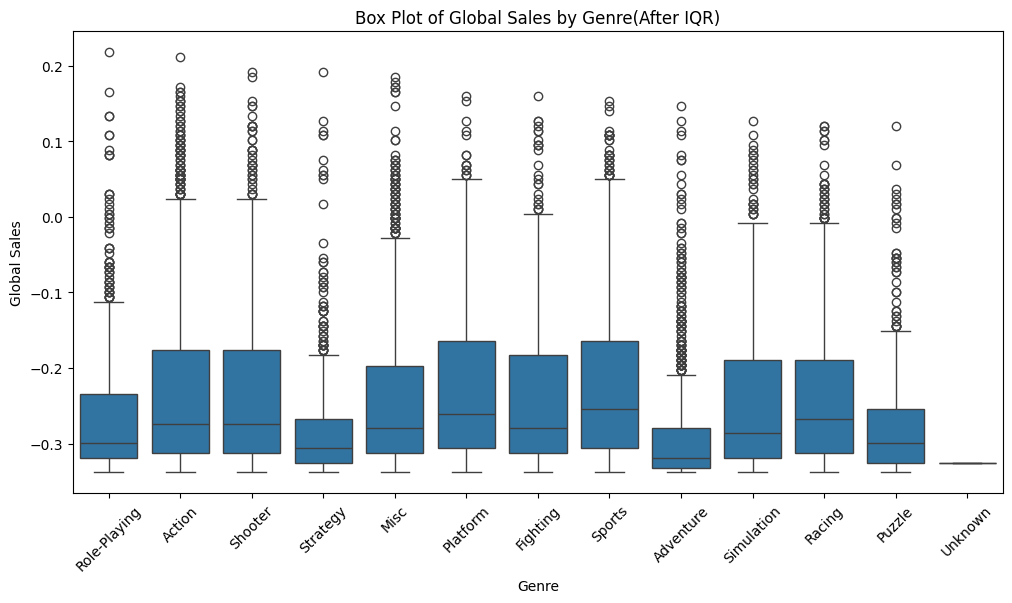

In [ ]:
# Finidng the relationship with the Genre and Global Sales
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='Global_Sales', data=videogames_df_reduced)
plt.title('Box Plot of Global Sales by Genre(After IQR)')
plt.xlabel('Genre')
plt.ylabel('Global Sales')
plt.xticks(rotation=45)
plt.show()

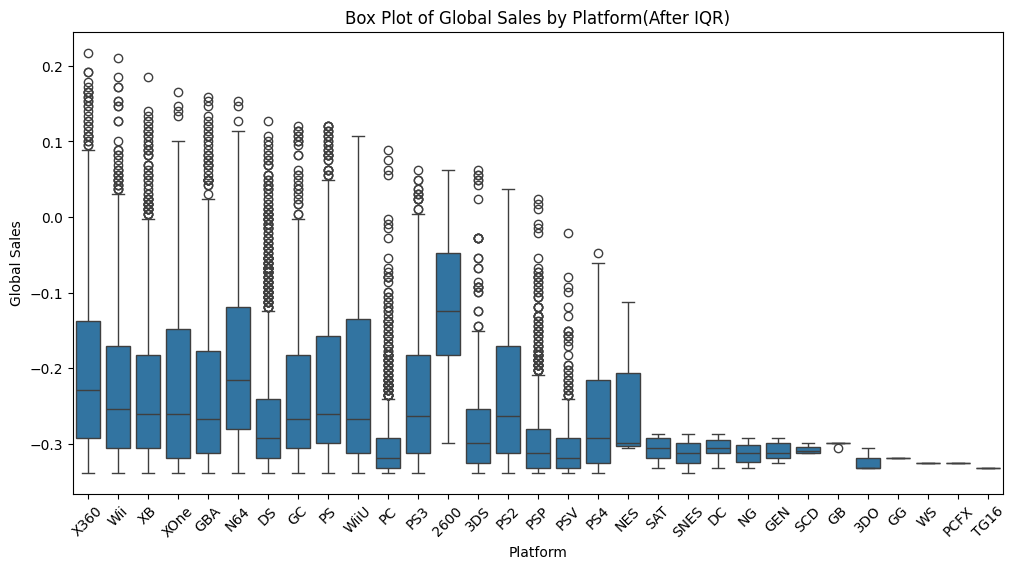

In [ ]:
# Finidng the relationship with the Platform and Global Sales
plt.figure(figsize=(12, 6))
sns.boxplot(x='Platform', y='Global_Sales', data=videogames_df_reduced)
plt.title('Box Plot of Global Sales by Platform(After IQR)')
plt.xlabel('Platform')
plt.ylabel('Global Sales')
plt.xticks(rotation=45)
plt.show()

In [38]:
#ANOVA or Mean Camparison for Categorical Values
from scipy import stats
categorical_columns = ['Name','Platform','Genre','Publisher']
def anova_test(videogames_df_reduced, categorical_columns, target_column='Global_Sales'):
  groups = [videogames_df_reduced[target_column][videogames_df_reduced[categorical_columns] == level]for level in videogames_df_reduced[categorical_columns].unique()]
  anova_result = stats.f_oneway(*groups)
  print(f"ANOVA result for {categorical_columns}: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")

anova_test(videogames_df_reduced, 'Platform', 'Global_Sales')
anova_test(videogames_df_reduced, 'Genre', 'Global_Sales')
anova_test(videogames_df_reduced, 'Publisher', 'Global_Sales')
anova_test(videogames_df_reduced, 'Name', 'Global_Sales')

ANOVA result for Platform: F-statistic = 47.43198881567052, p-value = 3.9169315207031234e-264
ANOVA result for Genre: F-statistic = 44.67781891411967, p-value = 1.3203618180071871e-104
ANOVA result for Publisher: F-statistic = 5.979342435273163, p-value = 2.5503e-319
ANOVA result for Name: F-statistic = 1.6140870323762728, p-value = 1.7517785191686926e-55


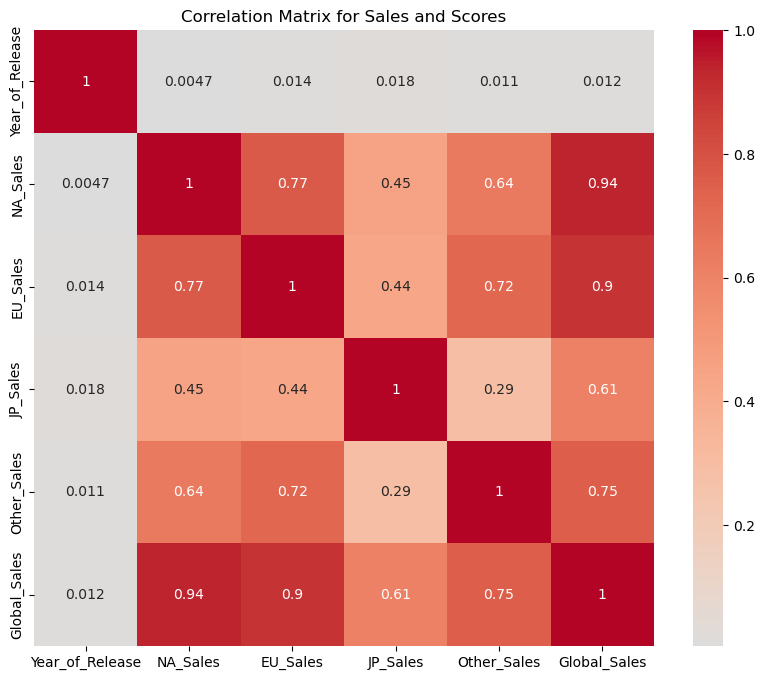

In [40]:
# Calculate correlation matrix for the columns of interest
correlation_matrix = videogames_df_cleaned.select_dtypes(include=np.number).corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix for Sales and Scores')
plt.show()

In [ ]:
videogames_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
display(Markdown("# Feature Engineering"))

# Feature Engineering

In [42]:

#Convert nominal categorical value into numerical by one hot encoding
videogames_df_reduced_converted = pd.get_dummies(videogames_df_reduced, columns=['Platform','Genre','Publisher'], drop_first=True)
videogames_df_reduced_converted

,Name,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_3DO,Platform_3DS,Platform_DC,...,Publisher_Zoo Games,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,Publisher_responDESIGN
2384,Kingdoms of Amalur: Reckoning,2012,0.352395,0.188717,-0.218913,0.121412,0.217365,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2413,Ghostbusters: The Video Game,2009,0.401566,0.109236,-0.251295,0.121412,0.210905,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2481,Duke Nukem Forever,2011,0.315517,0.208587,-0.251295,0.121412,0.191524,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2497,Sid Meier's Civilization Revolution,2008,0.389273,0.049626,-0.251295,0.121412,0.191524,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2503,James Bond 007: Nightfire,2002,0.389273,0.148977,-0.251295,-0.092830,0.185063,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,2016,-0.323705,-0.288166,-0.218913,-0.253512,-0.338230,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16715,LMA Manager 2007,2006,-0.323705,-0.268296,-0.251295,-0.253512,-0.338230,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16716,Haitaka no Psychedelica,2016,-0.323705,-0.288166,-0.218913,-0.253512,-0.338230,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16717,Spirits & Spells,2003,-0.311412,-0.288166,-0.251295,-0.253512,-0.338230,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [44]:
#Define Target and Features Variable now
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

X = videogames_df_reduced_converted.drop(['Name','Global_Sales','Year_of_Release','NA_Sales','EU_Sales'], axis=1)
y = videogames_df_reduced_converted['Global_Sales']

##Random Forest Regressor


In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Base Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Cross-validation setup
cv_score = KFold(n_splits=5, shuffle=True, random_state=42)

# Scores for each fold
kfold_mae = []
kfold_mse = []
kfold_r_squared = []

kfold_mae_train = []
kfold_mse_train = []
kfold_r_squared_train = []

# K-Fold Cross Validation
for train_index, test_index in cv_score.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Hyperparameter tuning with GridSearchCV
    grid_search = GridSearchCV(
        estimator=rf_model,
        param_grid=param_grid,
        cv=3,  # Inner cross-validation for hyperparameter tuning
        scoring='neg_mean_absolute_error',
        n_jobs=-1,
        verbose=2
    )

    # Fit GridSearchCV
    grid_search.fit(X_train, y_train)

    # Retrieve the best model from GridSearchCV
    best_rf_model = grid_search.best_estimator_
    print(f"Best Parameters: {grid_search.best_params_}\n")

    # Train the best model on the training data
    best_rf_model.fit(X_train, y_train)

    # Predictions on training data
    train_pred = best_rf_model.predict(X_train)
    lr_mae_train = mean_absolute_error(y_train, train_pred)
    lr_mse_train = mean_squared_error(y_train, train_pred)
    lr_r2_train = r2_score(y_train, train_pred)

    # Predictions on test data
    y_pred_rf = best_rf_model.predict(X_test)

    print("\n############# Model Evaluation ##############\n")
    lr_mae = mean_absolute_error(y_test, y_pred_rf)
    print(f"MAE: {lr_mae}")

    lr_mse = mean_squared_error(y_test, y_pred_rf)
    print(f"MSE: {lr_mse}")

    r2 = r2_score(y_test, y_pred_rf)
    print(f"R2 Score: {r2}")

    # Store scores for test data
    kfold_mae.append(lr_mae)
    kfold_mse.append(lr_mse)
    kfold_r_squared.append(r2)

    # Store scores for training data
    kfold_mae_train.append(lr_mae_train)
    kfold_mse_train.append(lr_mse_train)
    kfold_r_squared_train.append(lr_r2_train)

# Final Results
print("\n##### Final Cross-Validation Results #####")
print(f"Mean MAE (Test): {sum(kfold_mae) / len(kfold_mae)}")
print(f"Mean MSE (Test): {sum(kfold_mse) / len(kfold_mse)}")
print(f"Mean R2 Score (Test): {sum(kfold_r_squared) / len(kfold_r_squared)}")

print(f"\nMean MAE (Train): {sum(kfold_mae_train) / len(kfold_mae_train)}")
print(f"Mean MSE (Train): {sum(kfold_mse_train) / len(kfold_mse_train)}")
print(f"Mean R2 Score (Train): {sum(kfold_r_squared_train) / len(kfold_r_squared_train)}")


Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}


############# Model Evaluation ##############

MAE: 0.023156733698286205
MSE: 0.0015165226732571817
R2 Score: 0.8618113669038614
Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}


############# Model Evaluation ##############

MAE: 0.022556967492059616
MSE: 0.0014733359354781065
R2 Score: 0.8615794924182818
Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


############# Model Evaluation ##############

MAE: 0.022629280868320254
MSE: 0.0014656861043667476
R2 Score: 0.8612543077568484
Fitting 3 folds for each of 324 candi

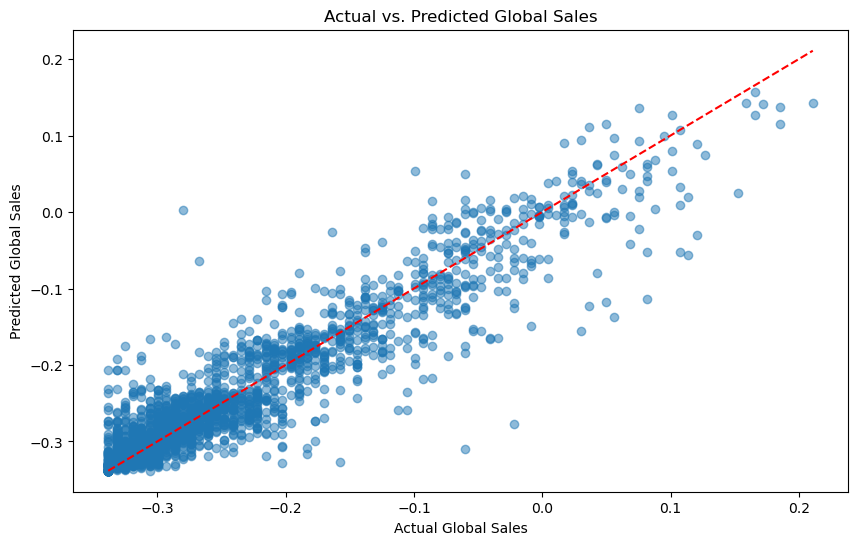

In [41]:
#Visualizing predictions and Actual Values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line y=x for reference
plt.xlabel("Actual Global Sales")
plt.ylabel("Predicted Global Sales")
plt.title("Actual vs. Predicted Global Sales")
plt.show()

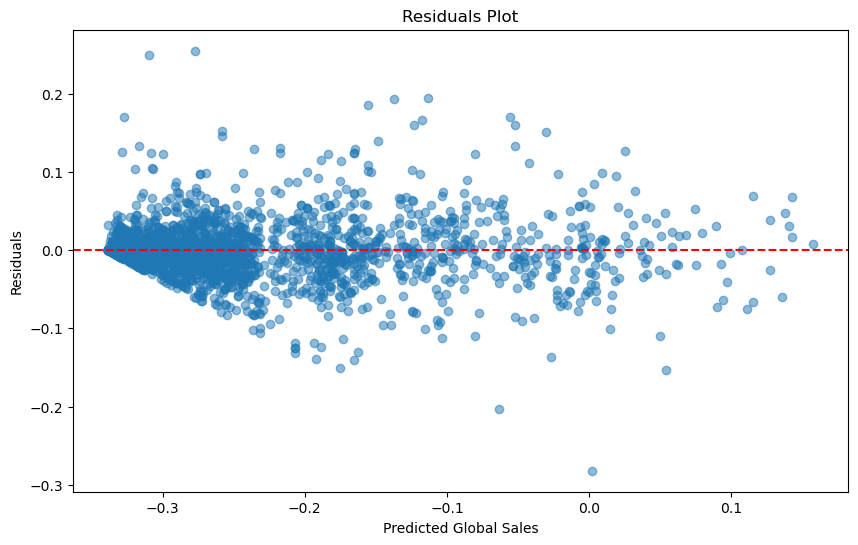

In [43]:
#Residual Analysis
# Calculate residuals
residuals = y_test - y_pred_rf

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Global Sales")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()

In [26]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [30]:
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 2, 5]
}

# Base XGBoost model
xgb_model = XGBRegressor(random_state=42, objective='reg:squarederror')

# Cross-validation setup
cv_score = KFold(n_splits=5, shuffle=True, random_state=42)

# Scores for each fold
kfold_mae = []
kfold_mse = []
kfold_r_squared = []

kfold_mae_train = []
kfold_mse_train = []
kfold_r_squared_train = []

# K-Fold Cross Validation
for train_index, test_index in cv_score.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Hyperparameter tuning with GridSearchCV
    grid_search = GridSearchCV(
        estimator=xgb_model,
        param_grid=param_grid,
        cv=3,  # Inner cross-validation for hyperparameter tuning
        scoring='neg_mean_absolute_error',
        n_jobs=-1,
        verbose=2
    )

    # Fit GridSearchCV
    grid_search.fit(X_train, y_train)

    # Retrieve the best model from GridSearchCV
    best_xgb_model = grid_search.best_estimator_
    print(f"Best Parameters: {grid_search.best_params_}\n")

    # Train the best model on the training data
    best_xgb_model.fit(X_train, y_train)

    # Predictions on training data
    train_pred = best_xgb_model.predict(X_train)
    lr_mae_train = mean_absolute_error(y_train, train_pred)
    lr_mse_train = mean_squared_error(y_train, train_pred)
    lr_r2_train = r2_score(y_train, train_pred)

    # Predictions on test data
    y_pred_xgb = best_xgb_model.predict(X_test)

    print("\n############# Model Evaluation ##############\n")
    lr_mae = mean_absolute_error(y_test, y_pred_xgb)
    print(f"MAE: {lr_mae}")

    lr_mse = mean_squared_error(y_test, y_pred_xgb)
    print(f"MSE: {lr_mse}")

    r2 = r2_score(y_test, y_pred_xgb)
    print(f"R2 Score: {r2}")

    # Store scores for test data
    kfold_mae.append(lr_mae)
    kfold_mse.append(lr_mse)
    kfold_r_squared.append(r2)

    # Store scores for training data
    kfold_mae_train.append(lr_mae_train)
    kfold_mse_train.append(lr_mse_train)
    kfold_r_squared_train.append(lr_r2_train)

# Final Results
print("\n##### Final Cross-Validation Results #####")
print(f"Mean MAE (Test): {sum(kfold_mae) / len(kfold_mae)}")
print(f"Mean MSE (Test): {sum(kfold_mse) / len(kfold_mse)}")
print(f"Mean R2 Score (Test): {sum(kfold_r_squared) / len(kfold_r_squared)}")

print(f"\nMean MAE (Train): {sum(kfold_mae_train) / len(kfold_mae_train)}")
print(f"Mean MSE (Train): {sum(kfold_mse_train) / len(kfold_mse_train)}")
print(f"Mean R2 Score (Train): {sum(kfold_r_squared_train) / len(kfold_r_squared_train)}")


Fitting 3 folds for each of 972 candidates, totalling 2916 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=2, subsample=0.8; total time=   2.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=2, subsample=0.8; total time=   2.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=5, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=2, subsample=0.8; total time=   2.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimato

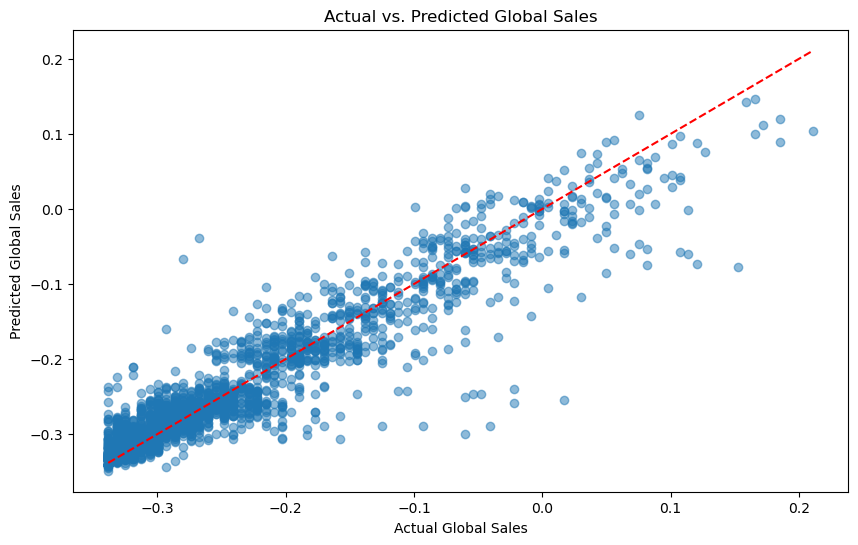

In [32]:
#Visualizing predictions and Actual Values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line y=x for reference
plt.xlabel("Actual Global Sales")
plt.ylabel("Predicted Global Sales")
plt.title("Actual vs. Predicted Global Sales")
plt.show()

In [3]:
#Residual Analysis
# Calculate residuals
residuals = y_test - y_pred_xgb

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_xgb, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Global Sales")
plt.ylabel("Residuals of XGBoost")
plt.title("Residuals Plot")
plt.show()

NameError: name 'y_test' is not defined